In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
import matplotlib.font_manager as fm
from matplotlib import rc

In [395]:
'''
Med_HisDF: medical history section
totalDF=Med_HisDF+인종과 교율레벨을 추가한 DataFrame
'''

'\nMed_HisDF: medical history section\n'

In [396]:
DF=pd.read_csv(r'C:\Users\gy931\OneDrive\Desktop\KDP-7\03.VISUAL\DATA\alzheimers_disease_data.csv')

In [397]:
# [데이터 준비]
DF1=DF.loc[:,'FamilyHistoryAlzheimers':'Hypertension']
Med_HisDF=pd.concat([DF1,DF['Diagnosis']],axis=1)

In [398]:
# [데이터 확인]
Med_HisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   FamilyHistoryAlzheimers  2149 non-null   int64
 1   CardiovascularDisease    2149 non-null   int64
 2   Diabetes                 2149 non-null   int64
 3   Depression               2149 non-null   int64
 4   HeadInjury               2149 non-null   int64
 5   Hypertension             2149 non-null   int64
 6   Diagnosis                2149 non-null   int64
dtypes: int64(7)
memory usage: 117.6 KB


In [399]:
Med_HisDF.describe()
Med_HisDF.corr()

,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,Diagnosis
FamilyHistoryAlzheimers,1.000000,0.020783,-0.023106,0.000796,-0.019184,0.012920,-0.032900
CardiovascularDisease,0.020783,1.000000,-0.010134,0.006043,0.001342,-0.011760,0.031490
Diabetes,-0.023106,-0.010134,1.000000,0.003310,-0.000013,-0.000898,-0.031508
Depression,0.000796,0.006043,0.003310,1.000000,-0.007662,0.032061,-0.005893
HeadInjury,-0.019184,0.001342,-0.000013,-0.007662,1.000000,-0.016380,-0.021411
Hypertension,0.012920,-0.011760,-0.000898,0.032061,-0.016380,1.000000,0.035080
Diagnosis,-0.032900,0.031490,-0.031508,-0.005893,-0.021411,0.035080,1.000000


In [400]:
for x in Med_HisDF.columns:
    print(x)
    print(Med_HisDF[x].unique())
    print('*'*40)

FamilyHistoryAlzheimers
[0 1]
****************************************
CardiovascularDisease
[0 1]
****************************************
Diabetes
[1 0]
****************************************
Depression
[1 0]
****************************************
HeadInjury
[0 1]
****************************************
Hypertension
[0 1]
****************************************
Diagnosis
[0 1]
****************************************


C:\Users\gy931\AppData\Local\Temp\ipykernel_14028\3325283942.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=6.1)


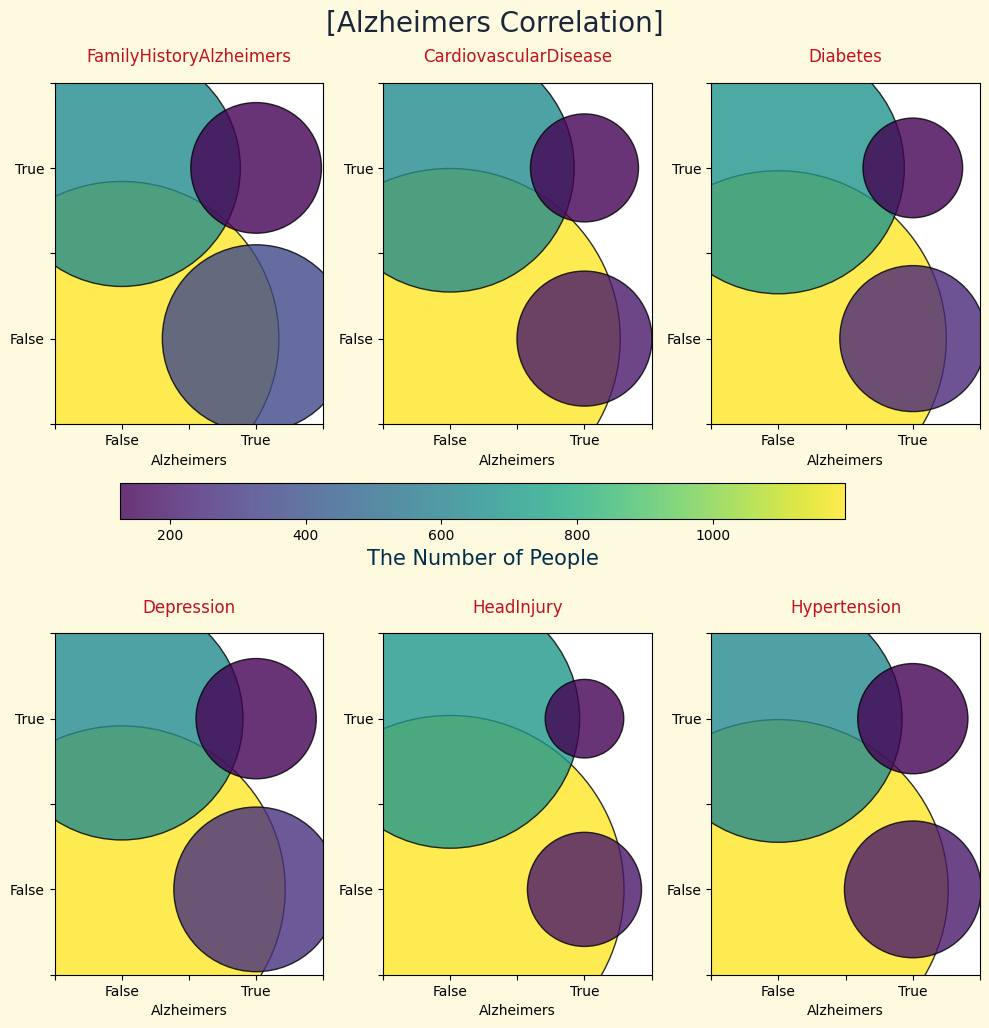

In [401]:

fig,axes=plt.subplots(2,3,figsize=(10,10))
plt.suptitle('[Alzheimers Correlation]',size=20,color='#1b263b')
fig.set_facecolor('#FEFAE0')
for x,y in zip(axes.flatten(),Med_HisDF.columns[:-1]):
    counts=Med_HisDF.groupby([y, 'Diagnosis']).size().reset_index(name='count')
    
    sizes=counts['count'].values*50
    colors = counts['count'].values
    
    a=x.scatter(counts[y]*2+1,counts['Diagnosis']*2+1,s=sizes,c=colors,alpha=0.8,edgecolors='k')
    x.set_title(y,pad=15,c='#c1121f')
    x.set_xticks([0,1,2,3,4],['','False','','True',''])
    x.set_yticks([0,1,2,3,4],['','False','','True',''])
    x.set_xlabel('Alzheimers')
plt.subplots_adjust(right=0.85)
cbar = fig.colorbar(a, location='bottom',fraction=0.515,ax=axes)
cbar.set_label("The Number of People",size=15,c='#003049')
plt.tight_layout(h_pad=6.1)
plt.show()

In [402]:
counts=Med_HisDF.groupby(['HeadInjury', 'Diagnosis']).size().reset_index(name='count')
counts

,HeadInjury,Diagnosis,count
0,0,0,1254
1,0,1,696
2,1,0,135
3,1,1,64


Rectangle(xy=(-0, -0), width=20, height=7, angle=0)


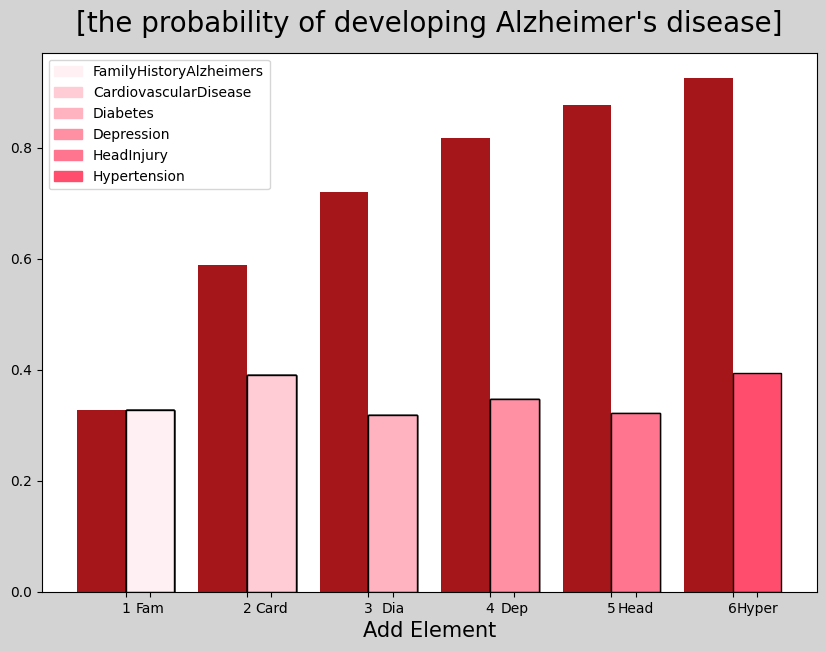

In [403]:
# 전체 질환을 갖고 있을때 걸릴 확률 증감 추이 살펴보기
a=[]
for x in Med_HisDF.columns[:-1]:
    y=Med_HisDF[x]==1
    z=(Med_HisDF[x]==1) & (Med_HisDF['Diagnosis']==1) 
    a.append(Med_HisDF.loc[z,x].shape[0]/Med_HisDF.loc[y,x].shape[0])
a
# 1개 ,2개 ,..., 6개를 했을때 걸릴 확률
b=[0.32656826568265684]
for x,y in zip(a[1:],range(len(a[1:]))):
    b.append(1-((1-x)*(1-b[y])))
b
fig=plt.figure(figsize=(10,7))
fig.set_facecolor('lightgray')
# bar형태로 시각화 하기
bars=plt.bar(range(0,len(b)*2,2),b,color='#a4161a')
plt.xticks(range(0,len(b)*2,2),[1,2,3,4,5,6])
# 추가 되는 요인 컬럼 색깔별로 들어가기
d=[0,0,0,0,0,0]
colors=['#fff0f3','#ffccd5','#ffb3c1','#ff8fa3','#ff758f','#ff4d6d']
for x,y in zip(range(0,7),a[:]):
    d.insert(x,y)    
    bars1=plt.bar(pd.Series(range(0,len(b)*2,2))+0.8,d[:len(b)],color=colors,edgecolor='k',label=Med_HisDF.columns[x])
    a=pd.Series(range(0,len(b)*2,2))+0.4
    b=pd.Series(range(0,len(b)*2,2))+0.8
    x=pd.concat([a,b])
    plt.xticks(x,[1,2,3,4,5,6,'Fam','Card','Dia','Dep','Head','Hyper'])
# legend 속성 사용해서 범례 색 변환하기
legend1=plt.legend()
for x,y in zip(legend1.get_patches(), bars1):
    x.set_color(y.get_facecolor())
plt.title("[the probability of developing Alzheimer's disease]",pad=15,size=20)
plt.xlabel('Add Element',size=15)
a=pd.Series(range(0,len(b)*2,2))+0.4
b=pd.Series(range(0,len(b)*2,2))+0.8
x=pd.concat([a,b])
x
print(legend1.get_patches()[0])

In [404]:
# 인정과 교육수준으로 확장
Med_HisDF=pd.concat([DF1,DF['Diagnosis']],axis=1)
totalDF=pd.concat([DF.iloc[:,3:5],Med_HisDF],axis=1)
totalDF

,Ethnicity,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,Diagnosis
0,0,2,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2144,0,1,0,0,0,0,0,0,1
2145,0,2,0,0,0,0,0,0,1
2146,0,1,0,0,0,0,0,0,1
2147,3,1,0,1,0,0,0,0,1


In [405]:
# 결측치 및 정보 확인하기
totalDF.isna().sum()
totalDF.describe()

,Ethnicity,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,0.697534,1.286645,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,0.353653
std,0.996128,0.904527,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,0.478214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [406]:
# 추가정보 확인하기
# 인종 {0: '코카서스인',1:'아프리카계 미국인',2: '아시안',3 : '기타'}
# 교육레벨 {0: '없음',1:'고등학교',2:'학사',3:'석사이상'}
# --------------------------------------
# 인종별 각 질환이 있을때 진단
# 교육레벨에 각 질환이 있을때 진단
# 인종별 교육레벨에 따른 질환이 잏을 떄 진단

In [407]:
# 인종별 각 질환이 있을때 진단 확률
b=pd.Series()
for x in range(4):
    a=[]
    for y in range(6):
        a.append(round(totalDF[(totalDF.iloc[:,0]==x) & (totalDF.iloc[:,y+2]==1)]['Diagnosis'].sum()/totalDF[(totalDF.iloc[:,0]==x) & (totalDF.iloc[:,y+2]==1)]['Diagnosis'].shape[0],3)*100)
    b=pd.concat([b,pd.Series(a)],axis=1)
b.columns=['a',0,1,2,3]
b.index=Med_HisDF.columns[:-1]
b.drop('a',axis=1,inplace=True)
b


,0,1,2,3
FamilyHistoryAlzheimers,32.2,30.3,36.0,37.3
CardiovascularDisease,36.4,45.9,44.7,33.3
Diabetes,30.7,26.9,43.3,39.3
Depression,34.0,37.1,42.9,26.8
HeadInjury,35.0,25.0,37.5,20.0
Hypertension,37.4,41.1,42.9,43.3


Text(0.5, 1.0, "[the probability of developing Alzheimer's disease]")

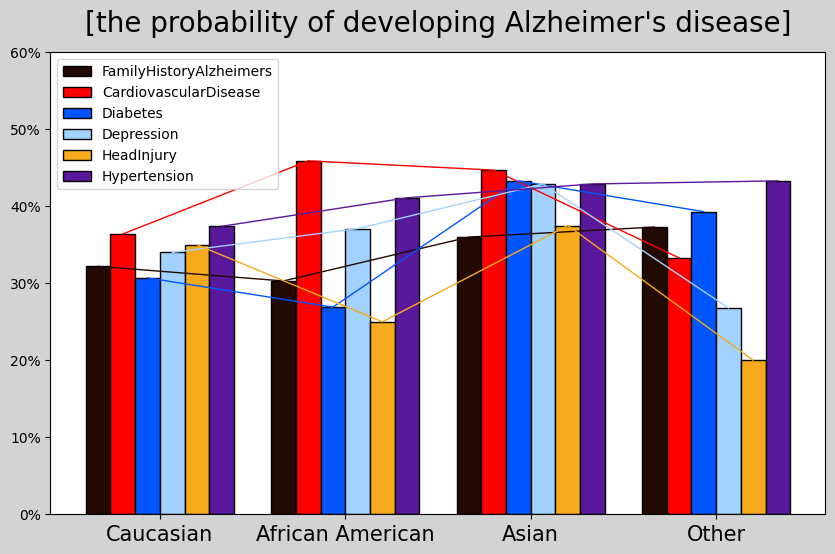

In [408]:
# 시각화
fig=plt.figure(figsize=(10,6))
fig.set_facecolor('lightgray')
for y in range(6):
    z=0.8*y
    x=pd.Series([1,2,3,4])*6
    colors=['#220901','#ff0000','#0355ff','#a2d2ff','#f6aa1c','#5a189a']
    plt.bar(x+z,b.iloc[y],color=colors[y],edgecolor='k',label=b.index[y])
    plt.plot(x+z,b.iloc[y],color=colors[y],linewidth=1)
    plt.xticks(x+2,['Caucasian','African American','Asian','Other'],size=15)
    plt.yticks(range(0,70,10),pd.Series(range(0,70,10)).astype('str').apply(lambda x:x+'%'))
    plt.legend()
plt.title("[the probability of developing Alzheimer's disease]",pad=15,size=20)


In [409]:
# 교육레벨에 각 질환이 있을때 진단
b=pd.Series()
for x in range(4):
    a=[]
    for y in range(6):
        a.append(round(totalDF[(totalDF.iloc[:,1]==x) & (totalDF.iloc[:,y+2]==1)]['Diagnosis'].sum()/totalDF[(totalDF.iloc[:,1]==x) & (totalDF.iloc[:,y+2]==1)]['Diagnosis'].shape[0],3)*100)
    b=pd.concat([b,pd.Series(a)],axis=1)
b.columns=['a',0,1,2,3]
b.index=Med_HisDF.columns[:-1]
b.drop('a',axis=1,inplace=True)
b

,0,1,2,3
FamilyHistoryAlzheimers,37.4,31.1,34.6,25.0
CardiovascularDisease,38.5,41.4,38.4,33.3
Diabetes,40.0,30.4,29.0,27.8
Depression,37.8,32.5,33.9,38.6
HeadInjury,40.5,30.0,30.0,29.4
Hypertension,39.7,39.6,32.1,56.7


0    37.4
2    34.6
1    31.1
3    25.0
dtype: float64
1    41.4
0    38.5
2    38.4
3    33.3
dtype: float64
0    40.0
1    30.4
2    29.0
3    27.8
dtype: float64
3    38.6
0    37.8
2    33.9
1    32.5
dtype: float64
0    40.5
1    30.0
2    30.0
3    29.4
dtype: float64
3    56.7
0    39.7
1    39.6
2    32.1
dtype: float64


Text(0.5, 1.0, "[the probability of developing Alzheimer's disease]")

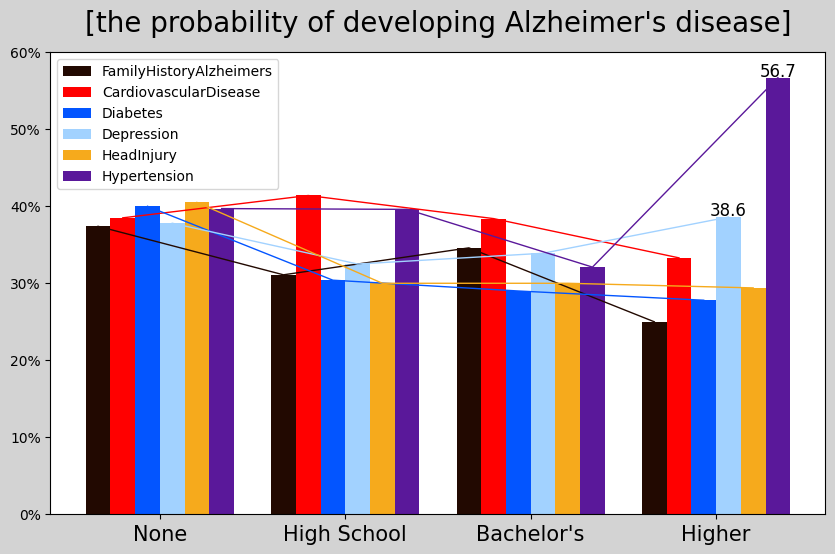

In [410]:
fig=plt.figure(figsize=(10,6))
fig.set_facecolor('lightgray')
max_value = b.values.max()

for y in range(6):
    z=0.8*y
    x=pd.Series([1,2,3,4])*6
    colors=['#220901','#ff0000','#0355ff','#a2d2ff','#f6aa1c','#5a189a']
    bar=plt.bar(x+z,b.iloc[y],color=colors[y],label=b.index[y])
    plt.plot(x+z,b.iloc[y],color=colors[y],linewidth=1)
    plt.xticks(x+2,['None','High School',"Bachelor's",'Higher'],size=15)
    plt.yticks(range(0,70,10),pd.Series(range(0,70,10)).astype('str').apply(lambda x:x+'%'))
    a=[]
    for rect in bar:    
        a.append(rect.get_height())    
    a=pd.Series(a).sort_values(ascending=False)
    print(a)
    plt.legend()
    if rect.get_height()==a.max():
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        plt.text(x + w/2.0, y + h+2, f'{h:.1f}', ha='center', va='top', size = 12,color='k')
plt.title("[the probability of developing Alzheimer's disease]",pad=15,size=20)




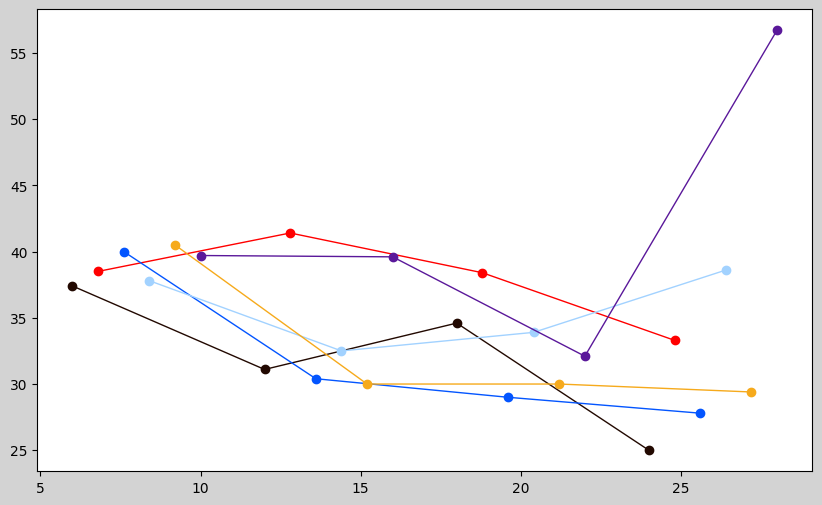

In [411]:
fig=plt.figure(figsize=(10,6))
fig.set_facecolor('lightgray')
max_value = b.values.max()
for y in range(6):
    z=0.8*y
    x=pd.Series([1,2,3,4])*6
    colors=['#220901','#ff0000','#0355ff','#a2d2ff','#f6aa1c','#5a189a']
    plt.plot(x+z,b.iloc[y],'o-',color=colors[y],linewidth=1)

In [412]:
# 인종별 교육레벨에 따른 질환이 잏을 떄 진단
ab=pd.Series()
for x in range(4):
    # 인종별 데이터 만들기
    mDF=totalDF[(totalDF.iloc[:,0]==x)]
    b=pd.Series()
    for x in range(4):
        a=[]
        for y in range(6):
            a.append(round(mDF[(mDF.iloc[:,1]==x) & (mDF.iloc[:,y+2]==1)]['Diagnosis'].sum()/mDF[(mDF.iloc[:,1]==x) & (mDF.iloc[:,y+2]==1)]['Diagnosis'].shape[0],3)*100)
        b=pd.concat([b,pd.Series(a)],axis=1)
    ab=pd.concat([ab,b],axis=1)
ab.dropna(axis=1,inplace=True)
ab.index=Med_HisDF.columns[:-1]
ab.columns=range(16)
ab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
FamilyHistoryAlzheimers,39.3,31.1,30.5,27.8,46.2,25.0,30.3,20.0,22.2,35.0,53.3,16.7,18.2,40.9,47.4,28.6
CardiovascularDisease,35.7,41.9,34.8,22.7,50.0,32.0,52.0,100.0,66.7,50.0,28.6,33.3,0.0,60.0,35.7,50.0
Diabetes,41.9,28.0,27.9,25.0,33.3,21.9,28.6,33.3,62.5,57.1,30.0,20.0,14.3,54.5,37.5,50.0
Depression,36.8,34.3,29.9,38.5,31.2,36.1,36.4,46.7,75.0,27.8,60.0,16.7,22.2,10.0,33.3,40.0
HeadInjury,55.6,26.1,35.1,20.0,22.2,31.2,16.7,33.3,0.0,50.0,37.5,100.0,0.0,25.0,0.0,33.3
Hypertension,51.9,34.4,31.8,46.7,28.6,50.0,20.0,60.0,42.9,44.4,37.5,50.0,20.0,50.0,45.5,100.0


In [413]:
ab1=pd.Series()
for x in range(4):
    # 인종별 데이터 만들기
    mDF=totalDF[(totalDF.iloc[:,0]==x)]
    b=pd.Series()
    for x in range(4):
        a=[]
        for y in range(6):
            a.append(mDF[(mDF.iloc[:,1]==x) & (mDF.iloc[:,y+2]==1)]['Diagnosis'].shape[0])
        b=pd.concat([b,pd.Series(a)],axis=1)
    ab1=pd.concat([ab1,b],axis=1)
ab1.dropna(axis=1,inplace=True)
ab1.index=Med_HisDF.columns[:-1]
ab1.columns=range(16)
ab1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
FamilyHistoryAlzheimers,61,119,95,36,26,48,33,15,9,20,15,6,11,22,19,7
CardiovascularDisease,42,74,46,22,8,25,25,3,9,12,14,3,6,5,14,2
Diabetes,43,75,61,20,12,32,14,9,8,7,10,5,7,11,8,2
Depression,57,99,77,26,16,36,22,15,8,18,10,6,9,10,12,10
HeadInjury,27,46,37,10,9,16,12,3,5,10,8,1,1,8,3,3
Hypertension,27,96,44,15,14,34,15,10,7,18,8,2,10,6,11,3


Text(0.5, 0.92, "Caucasian's the probability of developing Alz's disease")

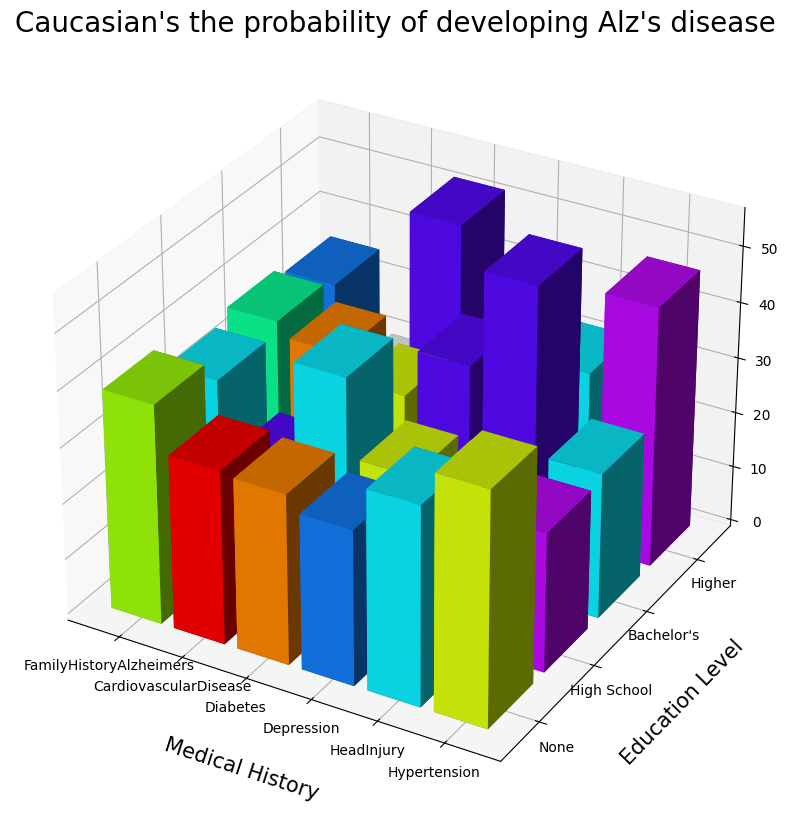

In [414]:
colors=[]
for x in ab1.iloc[:,:4].values.flatten():
    if x>100: colors.append('#ff0000')
    elif x>90: colors.append('#ff8700')
    elif x>80: colors.append('#ffd300')
    elif x>70: colors.append('#deff0a')
    elif x>60: colors.append('#a1ff0a')
    elif x>50: colors.append('#0aff99')
    elif x>40: colors.append('#0aefff')
    elif x>30: colors.append('#147df5')
    elif x>20: colors.append('#580aff')
    elif x>10: colors.append('#be0aff')
    else: colors.append('#f6fff8')
colors=pd.Series(colors)

x=range(6)
y=ab.columns[:4]
# 2D 그리드 생성
x,y=np.meshgrid(x,y)
x=x.flatten()
y=y.flatten()
z=np.zeros_like(x)
dx=dy=0.8
dz=ab.iloc[:,:4].values.flatten()
dz
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ab1
ax.bar3d(x,y,z,dx,dy,dz,shade=True,color=colors,label=labels)
ax.set_xticks(pd.Series(range(6))+0.4,ab.index,color='k')
ax.set_xlabel('Medical History',labelpad=20,size=15)
ax.set_ylabel('Education Level',labelpad=20,size=15)
ax.set_yticks(pd.Series(range(4))+0.4,['None','High School',"Bachelor's",'Higher'])
ax.set_title("Caucasian's the probability of developing Alz's disease",size=20)

Text(0.5, 0.92, "African American's the probability of developing Alz's disease")

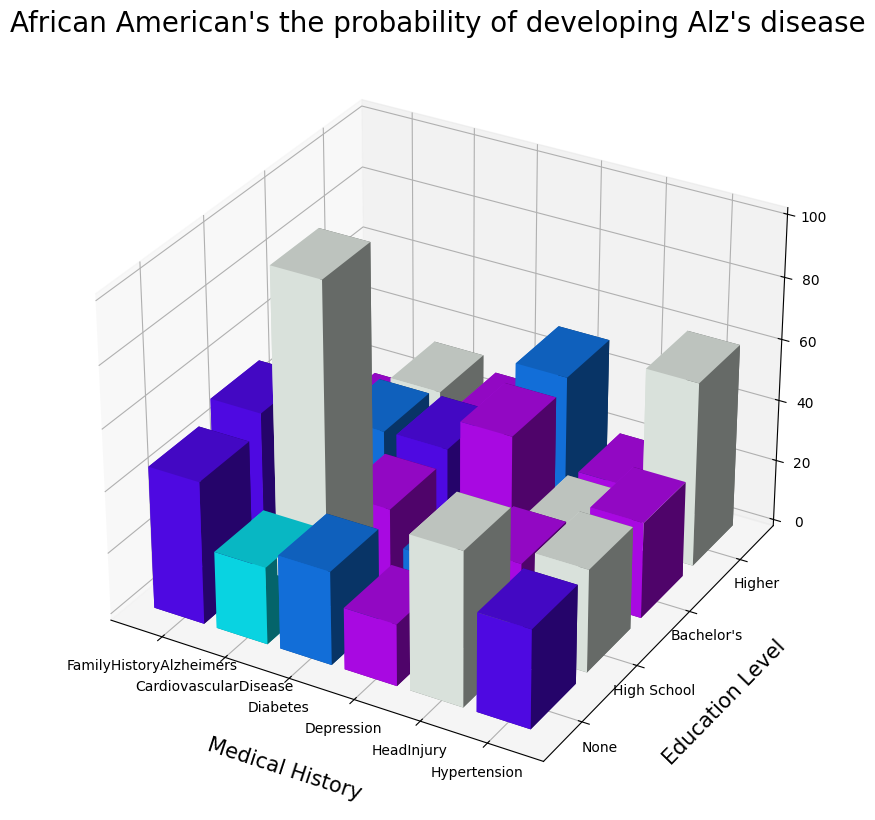

In [416]:
colors=[]
for x in ab1.iloc[:,4:8].values.flatten():
    if x>100: colors.append('#ff0000')
    elif x>90: colors.append('#ff8700')
    elif x>80: colors.append('#ffd300')
    elif x>70: colors.append('#deff0a')
    elif x>60: colors.append('#a1ff0a')
    elif x>50: colors.append('#0aff99')
    elif x>40: colors.append('#0aefff')
    elif x>30: colors.append('#147df5')
    elif x>20: colors.append('#580aff')
    elif x>10: colors.append('#be0aff')
    else: colors.append('#f6fff8')
labels=[]
for x in ab1.iloc[:,4:8].values.flatten():
    if x>100: labels.append('100 >')
    elif x>90: labels.append('90 >')
    elif x>80: labels.append('80 >')
    elif x>70: labels.append('70 >')
    elif x>60: labels.append('60 >')
    elif x>50: labels.append('50 >')
    elif x>40: labels.append('40 >')
    elif x>30: labels.append('30 >')
    elif x>20: labels.append('20 >')
    elif x>10: labels.append('10 >')
    else: labels.append('10 =<')
colors=pd.Series(colors)
labels=pd.Series(labels)
cmap = plt.Colormap(colors)
x=range(6)
y=ab.columns[0:4]
# 2D 그리드 생성
x,y=np.meshgrid(x,y)
x=x.flatten()
y=y.flatten()
z=np.zeros_like(x)
dx=dy=0.8
dz=ab.iloc[:,4:8].values.flatten()
dz
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ab1
ax.bar3d(x,y,z,dx,dy,dz,shade=True,color=colors,label=labels)
# mappable = plt.cm.ScalarMappable(cmap=cmap)
# print(mappable)
# plt.colorbar(mappable, ax=ax)
ax.set_xticks(pd.Series(range(6))+0.4,ab.index,color='k')
ax.set_xlabel('Medical History',labelpad=20,size=15)
ax.set_ylabel('Education Level',labelpad=20,size=15)
ax.set_yticks(pd.Series(range(4))+0.4,['None','High School',"Bachelor's",'Higher'])
ax.set_title("African American's the probability of developing Alz's disease",size=20)

Text(0.5, 0.92, "Asian's the probability of developing Alz's disease")

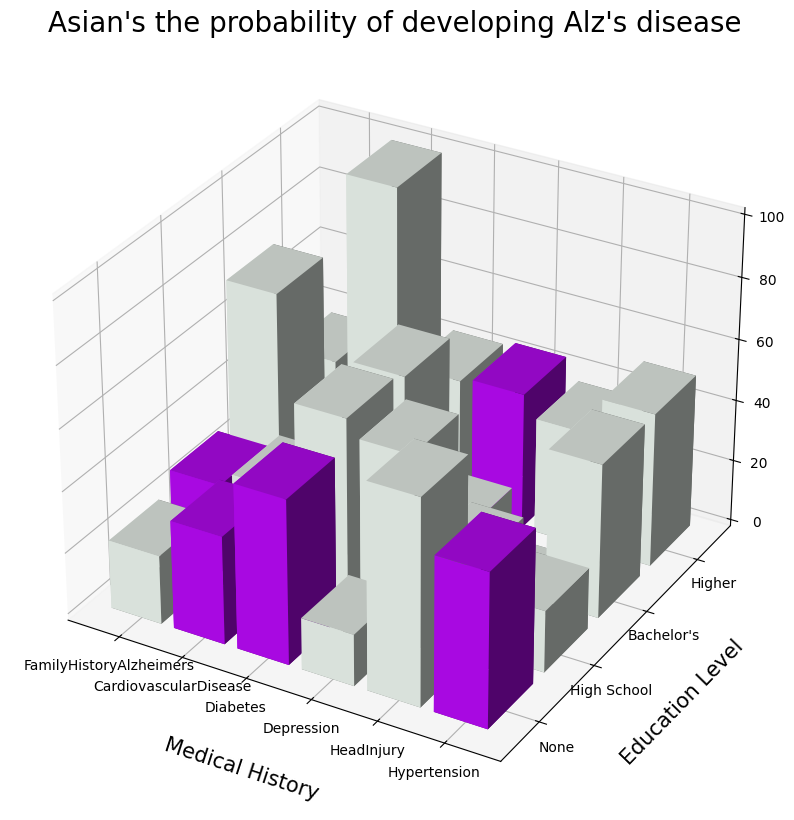

In [417]:
colors=[]
for x in ab1.iloc[:,8:12].values.flatten():
    if x>100: colors.append('#ff0000')
    elif x>90: colors.append('#ff8700')
    elif x>80: colors.append('#ffd300')
    elif x>70: colors.append('#deff0a')
    elif x>60: colors.append('#a1ff0a')
    elif x>50: colors.append('#0aff99')
    elif x>40: colors.append('#0aefff')
    elif x>30: colors.append('#147df5')
    elif x>20: colors.append('#580aff')
    elif x>10: colors.append('#be0aff')
    else: colors.append('#f6fff8')
labels=[]
for x in ab1.iloc[:,8:12].values.flatten():
    if x>100: labels.append('100 >')
    elif x>90: labels.append('90 >')
    elif x>80: labels.append('80 >')
    elif x>70: labels.append('70 >')
    elif x>60: labels.append('60 >')
    elif x>50: labels.append('50 >')
    elif x>40: labels.append('40 >')
    elif x>30: labels.append('30 >')
    elif x>20: labels.append('20 >')
    elif x>10: labels.append('10 >')
    else: labels.append('10 =<')
colors=pd.Series(colors)
labels=pd.Series(labels)
cmap = plt.Colormap(colors)
x=range(6)
y=ab.columns[0:4]
# 2D 그리드 생성
x,y=np.meshgrid(x,y)
x=x.flatten()
y=y.flatten()
z=np.zeros_like(x)
dx=dy=0.8
dz=ab.iloc[:,8:12].values.flatten()
dz
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ab1
ax.bar3d(x,y,z,dx,dy,dz,shade=True,color=colors,label=labels)
# mappable = plt.cm.ScalarMappable(cmap=cmap)
# print(mappable)
# plt.colorbar(mappable, ax=ax)
ax.set_xticks(pd.Series(range(6))+0.4,ab.index,color='k')
ax.set_xlabel('Medical History',labelpad=20,size=15)
ax.set_ylabel('Education Level',labelpad=20,size=15)
ax.set_yticks(pd.Series(range(4))+0.4,['None','High School',"Bachelor's",'Higher'])
ax.set_title("Asian's the probability of developing Alz's disease",size=20)

Text(0.5, 0.92, "Other's the probability of developing Alz's disease")

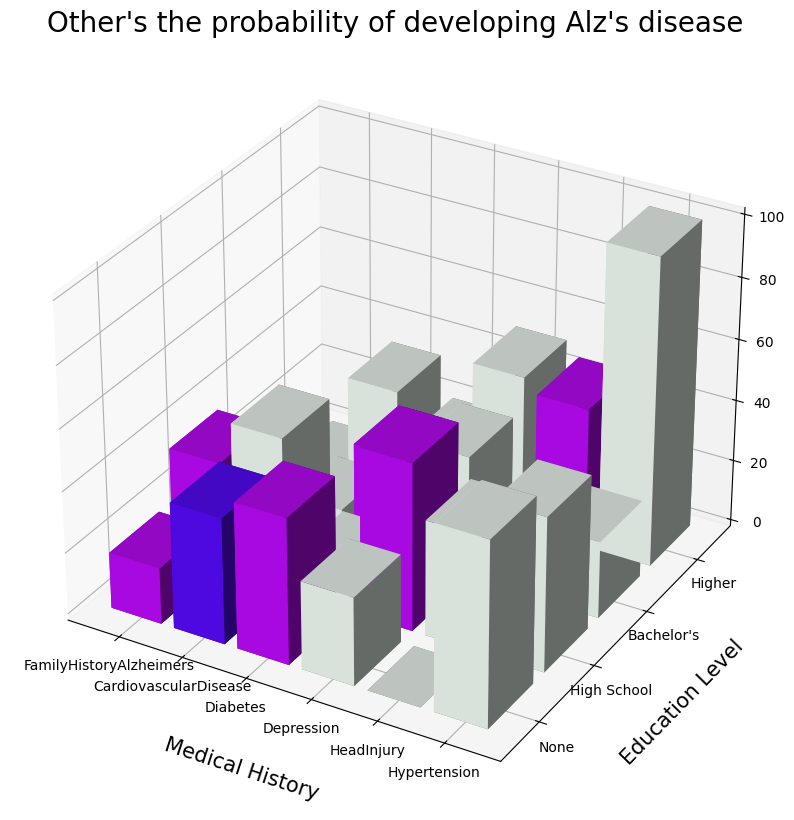

In [418]:
colors=[]
for x in ab1.iloc[:,12:].values.flatten():
    if x>100: colors.append('#ff0000')
    elif x>90: colors.append('#ff8700')
    elif x>80: colors.append('#ffd300')
    elif x>70: colors.append('#deff0a')
    elif x>60: colors.append('#a1ff0a')
    elif x>50: colors.append('#0aff99')
    elif x>40: colors.append('#0aefff')
    elif x>30: colors.append('#147df5')
    elif x>20: colors.append('#580aff')
    elif x>10: colors.append('#be0aff')
    else: colors.append('#f6fff8')
labels=[]
for x in ab1.iloc[:,12:].values.flatten():
    if x>100: labels.append('100 >')
    elif x>90: labels.append('90 >')
    elif x>80: labels.append('80 >')
    elif x>70: labels.append('70 >')
    elif x>60: labels.append('60 >')
    elif x>50: labels.append('50 >')
    elif x>40: labels.append('40 >')
    elif x>30: labels.append('30 >')
    elif x>20: labels.append('20 >')
    elif x>10: labels.append('10 >')
    else: labels.append('10 =<')
colors=pd.Series(colors)
labels=pd.Series(labels)
cmap = plt.Colormap(colors)
x=range(6)
y=ab.columns[0:4]
# 2D 그리드 생성
x,y=np.meshgrid(x,y)
x=x.flatten()
y=y.flatten()
z=np.zeros_like(x)
dx=dy=0.8
dz=ab.iloc[:,12:].values.flatten()
dz
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ab1
ax.bar3d(x,y,z,dx,dy,dz,shade=True,color=colors,label=labels)
# mappable = plt.cm.ScalarMappable(cmap=cmap)
# print(mappable)
# plt.colorbar(mappable, ax=ax)
ax.set_xticks(pd.Series(range(6))+0.4,ab.index,color='k')
ax.set_xlabel('Medical History',labelpad=20,size=15)
ax.set_ylabel('Education Level',labelpad=20,size=15)
ax.set_yticks(pd.Series(range(4))+0.4,['None','High School',"Bachelor's",'Higher'])
ax.set_title("Other's the probability of developing Alz's disease",size=20)

In [419]:
DF.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

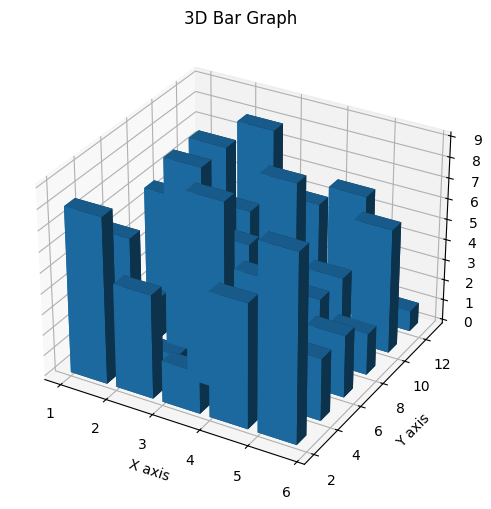

In [420]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 샘플 데이터 생성
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10,12])
x,y=np.meshgrid(x, y)  # 2D 그리드를 생성
x = x.flatten()
y = y.flatten()
x
y
z = np.zeros_like(x)  # 바의 바닥 높이
dx = dy = 0.8  # 바의 폭
dz = np.random.randint(1, 10, size=len(x))  # 랜덤한 바 높이

# 3D 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D 바 그래프 그리기
ax.bar3d(x, y, z, dx, dy, dz, shade=True)

# 축 레이블 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Bar Graph')

# 그래프 출력
plt.show()


(array([1607.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         542.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

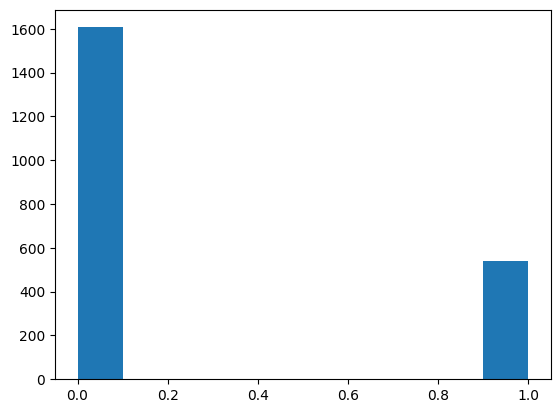

In [421]:
plt.hist(Med_HisDF['FamilyHistoryAlzheimers'])